In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [12]:
#Collecting X and Y

X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [13]:
#Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total Number of values
m = len(X)

#Calculate values of b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

#Print Coefficients
print(b1, b0)


0.26342933948939945 325.57342104944223


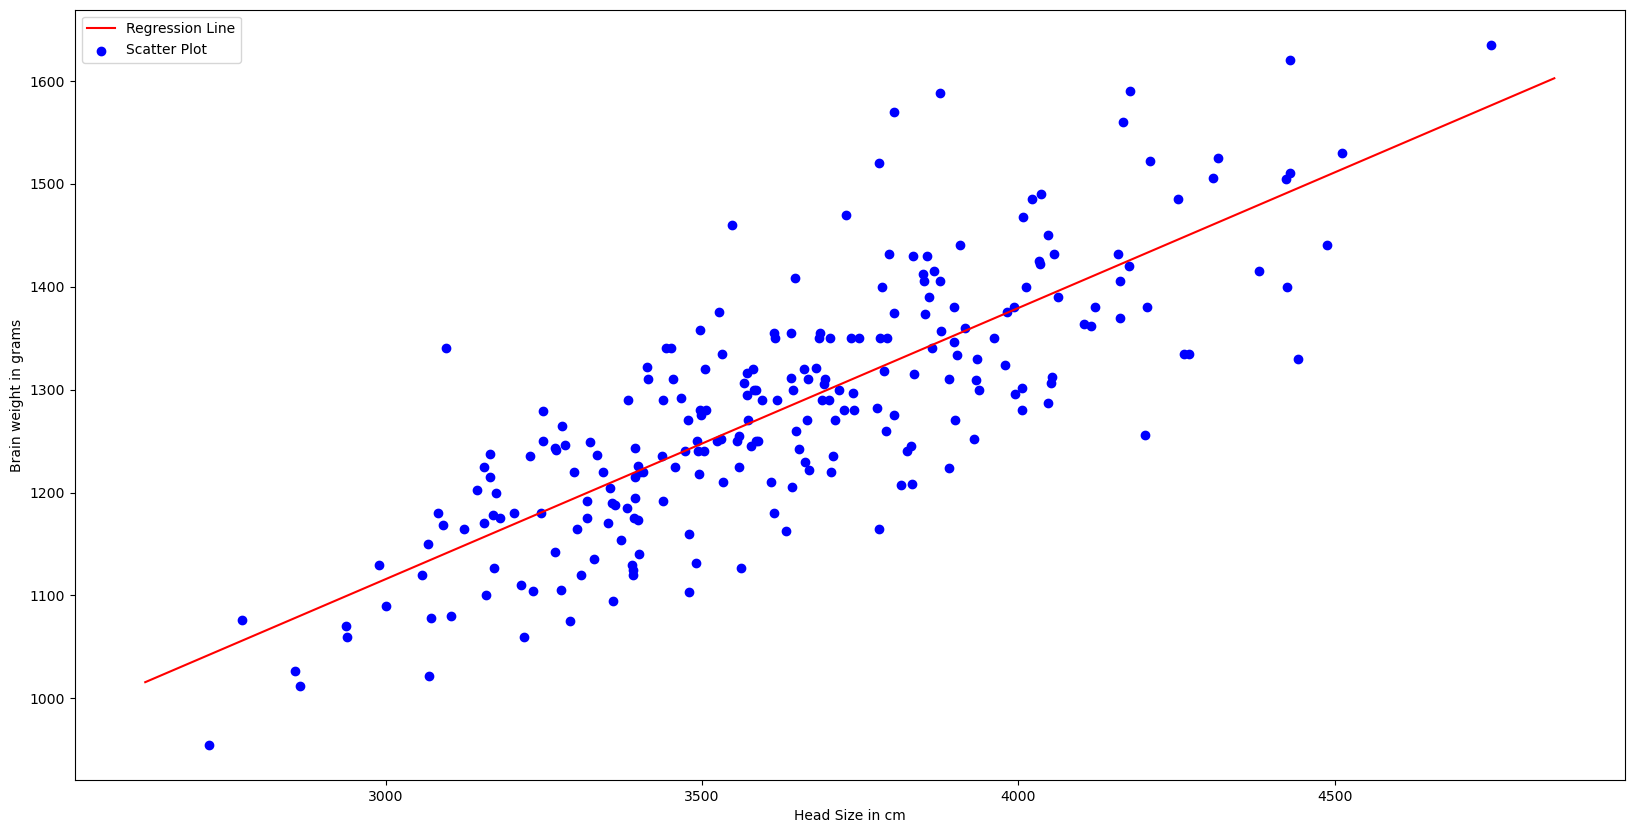

In [14]:
# Plotting values and Regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#Plotting Line
plt.plot(x, y, color='red', label='Regression Line')
#Plotting Scatter plot
plt.scatter(X, Y, c='blue', label='Scatter Plot')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()


In [15]:
ss_t =0
ss_r =0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
#Creating Model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X,Y)
#Y prediction
Y_pred = reg.predict(X)

#Calculating R2 score

r2_score = reg.score(X,Y)

print(r2_score)

0.639311719957
